### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics Using Python

## Practical activity: Outlier analysis

**This is the solution to the activity.**

Canopy is a new boutique streaming company that is looking to create an app that provides recommendations based on the last movie you watched. As a part of their process, they want to review the data and gather enough information before they start making suggestions and recommendations to their clients. 

This analysis uses the `movies.csv` and `ott.xlsx` data sets. Based on the available information, in this activity you will:

- perform an outlier analysis on the data to detect outliers or anomalies and find interesting relationships among the variables
- understand what the data says by visualising it on a boxplot.

## 1. Import the libraries

In [1]:
# Import necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Excel file

In [2]:
# Load the Excel data using pd.read_excel.
ott = pd.read_excel('../Data/ott.xlsx')

# View the columns.
print(ott.columns)

Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')


## Import CSV file

In [3]:
# Load the CSV data using pd.read_csv.
movies = pd.read_csv('../Data/movies.csv')

print(movies.columns)

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


## Validate the DataFrames

In [4]:
# Data imported correctly?
print(movies.head())
print(movies.shape)
print(movies.dtypes)

   ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    

In [5]:
# Data imported correctly?
print(ott.head())
print(ott.dtypes)
print(ott.shape)

   ID  Netflix  Hulu  Prime Video  Disney+
0   1        0     0            1        0
1   2        0     1            0        0
2   3        0     0            1        0
3   4        1     0            0        0
4   5        0     0            1        0
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object
(16744, 5)


## Combine the two DataFrames

In [6]:
# Merge the two DataFrames.
mov_ott = pd.merge(movies, ott, how='left', on = 'ID')

# View the DataFrame.
print(mov_ott.shape)
mov_ott.head()

(16744, 15)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


## 2. Create a boxplot

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

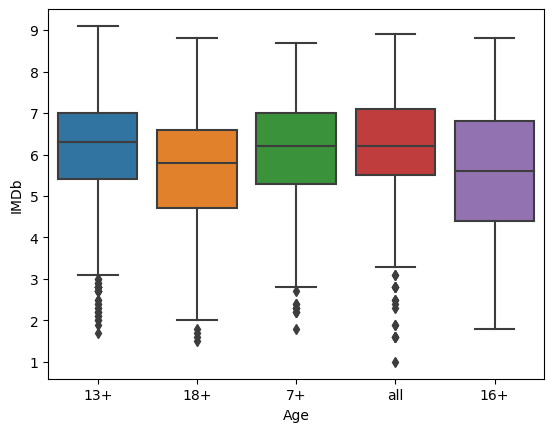

In [7]:
# Create boxplot with two variables (Age and IMDb).
sns.boxplot(x='Age', y='IMDb', data=mov_ott)